# Payment Date Prediction 


### Importing related Libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import VarianceThreshold
from sklearn.linear_model import LinearRegression 
from sklearn import metrics 
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import warnings
warnings.filterwarnings("ignore")

### Store the dataset into the Dataframe


In [2]:
data=pd.read_csv("new_dataset.csv")
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200125,20200126,20200210,USD,RV,1,NaN,54273.28,20200126,NAH4,1.930438e+09,0
1,U001,200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190722,20190722,20190811,USD,RV,1,NaN,79656.60,20190722,NAD1,1.929646e+09,0
2,U001,200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190914,20190914,20190929,USD,RV,1,NaN,2253.86,20190914,NAA8,1.929874e+09,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200330,20200330,20200410,CAD,RV,1,NaN,3299.70,20200331,CA10,2.960623e+09,1
4,U001,200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191113,20191113,20191128,USD,RV,1,NaN,33133.29,20191113,NAH4,1.930148e+09,0


### Check the shape of the dataframe


In [3]:
data.shape

(50099, 19)

### Check the Detail information of the dataframe

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50099 entries, 0 to 50098
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   business_code           50099 non-null  object 
 1   cust_number             50099 non-null  object 
 2   name_customer           50099 non-null  object 
 3   clear_date              40000 non-null  object 
 4   buisness_year           50099 non-null  int64  
 5   doc_id                  50099 non-null  int64  
 6   posting_date            50099 non-null  object 
 7   document_create_date    50099 non-null  int64  
 8   document_create_date.1  50099 non-null  int64  
 9   due_in_date             50099 non-null  int64  
 10  invoice_currency        50099 non-null  object 
 11  document type           50099 non-null  object 
 12  posting_id              50099 non-null  int64  
 13  area_business           0 non-null      float64
 14  total_open_amount       50099 non-null

### Display All the column names

In [5]:
cols=list(data)
print(cols)

['business_code', 'cust_number', 'name_customer', 'clear_date', 'buisness_year', 'doc_id', 'posting_date', 'document_create_date', 'document_create_date.1', 'due_in_date', 'invoice_currency', 'document type', 'posting_id', 'area_business', 'total_open_amount', 'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen']


### Describe the entire dataset

In [6]:
data.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50099.000000,5.009900e+04,5.009900e+04,5.009900e+04,5.009900e+04,50099.0,0.0,50099.000000,5.009900e+04,5.009300e+04,50099.000000
mean,2019.307072,2.014112e+09,2.019353e+07,2.019355e+07,2.019369e+07,1.0,NaN,32456.565546,2.019355e+07,2.013216e+09,0.201581
std,0.461284,2.912992e+08,4.501712e+03,4.487779e+03,4.475909e+03,0.0,NaN,39259.249400,4.488339e+03,2.795573e+08,0.401185
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929343e+09,2.019051e+07,2.019051e+07,2.019052e+07,1.0,NaN,4943.480000,2.019051e+07,1.929343e+09,0.000000
50%,2019.000000,1.929968e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17700.000000,2.019091e+07,1.929968e+09,0.000000
75%,2020.000000,1.930621e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47385.590000,2.020013e+07,1.930621e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [7]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200125,20200126,20200210,USD,RV,1,NaN,54273.28,20200126,NAH4,1.930438e+09,0
1,U001,200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190722,20190722,20190811,USD,RV,1,NaN,79656.60,20190722,NAD1,1.929646e+09,0
2,U001,200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190914,20190914,20190929,USD,RV,1,NaN,2253.86,20190914,NAA8,1.929874e+09,0
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200330,20200330,20200410,CAD,RV,1,NaN,3299.70,20200331,CA10,2.960623e+09,1
4,U001,200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191113,20191113,20191128,USD,RV,1,NaN,33133.29,20191113,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.012% null

In [8]:
print((data.isna().sum()/50000)*100)

business_code               0.000
cust_number                 0.000
name_customer               0.000
clear_date                 20.198
buisness_year               0.000
doc_id                      0.000
posting_date                0.000
document_create_date        0.000
document_create_date.1      0.000
due_in_date                 0.000
invoice_currency            0.000
document type               0.000
posting_id                  0.000
area_business             100.198
total_open_amount           0.000
baseline_create_date        0.000
cust_payment_terms          0.000
invoice_id                  0.012
isOpen                      0.000
dtype: float64


### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [9]:
data[['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1930438491
1,1.929646e+09,1929646410
2,1.929874e+09,1929873765
3,2.960623e+09,2960623488
4,1.930148e+09,1930147974
...,...,...
50094,2.960619e+09,2960618884
50095,2.960619e+09,2960618885
50096,2.960619e+09,2960618886
50097,2.960619e+09,2960618887


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [10]:
#document_create_date and baseline_create_date is same 15963 times.
ctr=0
for i, j in data.iterrows():
  if j[7]==int(j[15]):
    ctr+=1
  #else:  
    #print(j[7],j[15])
    #print()
print("Same Data count : ",ctr)    

Same Data count :  16062


In [11]:
#document_create_date.1 and baseline_create_date is same 44452 times.
ctr=0
for i, j in data.iterrows():
  if j[8]==int(j[15]):
    ctr+=1
  #else:  
    #print(j[8],j[15])
print("Same Data count : ",ctr)

Same Data count :  44551


In [12]:
#document_create_date.1 and document_create_date is same 21232 times.
ctr=0
for i, j in data.iterrows():
  if j[8]==int(j[7]):
    ctr+=1
  #else:  
    #print(j[8],j[7])
print("Same Data count : ",ctr)

Same Data count :  21331


#### Please check, Column 'posting_id' is constant columns or not


In [13]:
if data['posting_id'].nunique()==1:
    print("Constant Column")
else:
    print("Not a Constant Column")

Constant Column


#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [14]:
#isOpen col tells if an invoice is open or not, which is a very relevant information for the model ,
#as we must know which invoics are still open,so as to predict their clear date.
if data['isOpen'].nunique()==1:
    print("Constant Column")
else:
    print("Not a Constant Column")

Not a Constant Column


In [15]:
#80% of invoices has been closed , 20% invoices are yet to be closed
#we have to predict clear_date for those invoices
ctr=0
ctr1=0
for i in data['isOpen']:
  if i==0:
    ctr+=1  
  else:
    ctr1+=1  
print("closed invoice count : ",ctr)    
print("Percentage of closed invoice : ",(ctr/50000)*100,"%")
print("open invoice count : ",ctr1)
print("Percentage of open invoice : ",(ctr1/50000)*100,"%")

closed invoice count :  40000
Percentage of closed invoice :  80.0 %
open invoice count :  10099
Percentage of open invoice :  20.198 %


### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [16]:
lst=['area_business',"posting_id","invoice_id","document_create_date","isOpen",'document type','document_create_date.1']

data=data.drop(lst,axis=1)

### Please check from the dataframe whether all the columns are removed or not 

In [17]:
data

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
0,U001,200769623,WAL-MAR corp,11-02-2020 00:00,2020,1930438491,26-01-2020,20200210,USD,54273.28,20200126,NAH4
1,U001,200980828,BEN E,08-08-2019 00:00,2019,1929646410,22-07-2019,20190811,USD,79656.60,20190722,NAD1
2,U001,200792734,MDV/ trust,30-12-2019 00:00,2019,1929873765,14-09-2019,20190929,USD,2253.86,20190914,NAA8
3,CA02,140105686,SYSC llc,NaN,2020,2960623488,30-03-2020,20200410,CAD,3299.70,20200331,CA10
4,U001,200769623,WAL-MAR foundation,25-11-2019 00:00,2019,1930147974,13-11-2019,20191128,USD,33133.29,20191113,NAH4
...,...,...,...,...,...,...,...,...,...,...,...,...
50094,CA02,140106408,WAL-M corp,NaN,2020,2960618884,06-03-2020,20200316,CAD,92832.27,20200306,CA10
50095,CA02,140106408,WAL-M corp,NaN,2020,2960618885,06-03-2020,20200316,CAD,92832.27,20200306,CA10
50096,CA02,140106408,WAL-M corp,NaN,2020,2960618886,06-03-2020,20200316,CAD,92832.27,20200306,CA10
50097,CA02,140106408,WAL-M corp,NaN,2020,2960618887,06-03-2020,20200316,CAD,92832.27,20200306,CA10


### Show all the Duplicate rows from the dataframe

In [18]:
data[data.duplicated()]

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,200769623,WAL-MAR in,12-03-2019 00:00,2019,1928870382,28-02-2019,20190315,USD,19557.41,20190228,NAH4
2400,U001,200769623,WAL-MAR trust,28-08-2019 00:00,2019,1929758460,18-08-2019,20190902,USD,5600.41,20190818,NAH4
2584,U001,200769623,WAL-MAR corporation,16-12-2019 00:00,2019,1930216806,04-12-2019,20191219,USD,35352.17,20191204,NAH4
3755,U001,200769623,WAL-MAR,22-11-2019 00:00,2019,1930137035,12-11-2019,20191127,USD,2982.64,20191112,NAH4
3873,CA02,140104409,LOB associates,NaN,2020,2960628616,14-04-2020,20200425,CAD,82975.82,20200415,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49963,U001,200759878,SA us,29-01-2019 00:00,2019,1928613993,13-01-2019,20190128,USD,10968.24,20190113,NAH4
49986,U001,200772670,ASSOCIAT foundation,12-06-2019 00:00,2019,1929403090,29-05-2019,20190613,USD,155837.53,20190529,NAU5
49990,U001,200765011,MAINES llc,06-06-2019 00:00,2019,1929365364,22-05-2019,20190606,USD,4008.05,20190522,NAA8
49991,U001,200704045,RA trust,25-10-2019 00:00,2019,1930001131,10-10-2019,20191025,USD,73002.24,20191010,NAA8


### Display the Number of Duplicate Rows

In [19]:
data[data.duplicated()].count()

business_code           1162
cust_number             1162
name_customer           1162
clear_date               842
buisness_year           1162
doc_id                  1162
posting_date            1162
due_in_date             1162
invoice_currency        1162
total_open_amount       1162
baseline_create_date    1162
cust_payment_terms      1162
dtype: int64

### Drop all the Duplicate Rows

In [20]:
data=data.drop_duplicates()

#### Now check for all duplicate rows now

- Note - It must be 0 by now

In [21]:
data[data.duplicated()].count()

business_code           0
cust_number             0
name_customer           0
clear_date              0
buisness_year           0
doc_id                  0
posting_date            0
due_in_date             0
invoice_currency        0
total_open_amount       0
baseline_create_date    0
cust_payment_terms      0
dtype: int64

### Check for the number of Rows and Columns in your dataset

In [22]:
print('Rows : ',len(data),'\nColumns : ',len(data.columns))

Rows :  48937 
Columns :  12


### Find out the total count of null values in each columns

In [23]:
data.isna().sum()


business_code              0
cust_number                0
name_customer              0
clear_date              9779
buisness_year              0
doc_id                     0
posting_date               0
due_in_date                0
invoice_currency           0
total_open_amount          0
baseline_create_date       0
cust_payment_terms         0
dtype: int64

#Data type Conversion 

### Please check the data type of each column of the dataframe

In [24]:
data.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year             int64
doc_id                    int64
posting_date             object
due_in_date               int64
invoice_currency         object
total_open_amount       float64
baseline_create_date      int64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [25]:
data[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date              object
posting_date            object
due_in_date              int64
baseline_create_date     int64
dtype: object

### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [26]:
data['clear_date']=pd.to_datetime(data['clear_date'])
data['posting_date']=pd.to_datetime(data['posting_date'])
data['baseline_create_date']=pd.to_datetime(data['baseline_create_date'],format='%Y%m%d')
data['due_in_date']=pd.to_datetime(data['due_in_date'],format='%Y%m%d')

### Please check the datatype of all the columns after conversion of the above 4 columns

In [27]:
data[['clear_date','posting_date','due_in_date','baseline_create_date']].dtypes

clear_date              datetime64[ns]
posting_date            datetime64[ns]
due_in_date             datetime64[ns]
baseline_create_date    datetime64[ns]
dtype: object

#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [28]:
data['invoice_currency'].value_counts()

USD    45011
CAD     3926
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [29]:
data['total_open_amount']

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
50094    92832.27
50095    92832.27
50096    92832.27
50097    92832.27
50098    92832.27
Name: total_open_amount, Length: 48937, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [30]:
data['converted_usd']=np.where(data['invoice_currency']=='CAD',(data['total_open_amount']*0.7),data['total_open_amount'])

### Display the new "converted_usd" column values

In [31]:
data['converted_usd']

0        54273.280
1        79656.600
2         2253.860
3         2309.790
4        33133.290
           ...    
50094    64982.589
50095    64982.589
50096    64982.589
50097    64982.589
50098    64982.589
Name: converted_usd, Length: 48937, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [32]:
data.groupby('buisness_year').size()

buisness_year
2019    33975
2020    14962
dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [33]:
lst=['invoice_currency','total_open_amount']

data=data.drop(lst,axis=1)

### Write a code to check the number of columns in dataframe

In [34]:
def checkcols(df):
  return len(df.columns)

checkcols(data)

11

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [35]:
x=data.columns[data.isna().any()].tolist()
print(x)

['clear_date']


#### Find out the number of null values from the column that you got from the above code

In [36]:
print('Total records : ',len(data['clear_date']))
print()
print('Not null records : ',data['clear_date'].count())
print()
print('Null records : ',data['clear_date'].isna().sum())

Total records :  48937

Not null records :  39158

Null records :  9779


### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have NO NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [37]:
maindata=data.loc[data['clear_date'].notna()==True,data.columns]
nulldata=data.loc[data['clear_date'].isna()==True,data.columns]

In [38]:
print(maindata['clear_date'].isna().sum())
print(nulldata['clear_date'].notna().sum())

0
0


### Check the number of Rows and Columns for both the dataframes 

In [39]:
def ctr_rows_cols(df):
  print('Rows : ',len(df),'\nColumns : ',len(df.columns))

In [40]:
print("MAIN DATA")
ctr_rows_cols(maindata)
print()
print("NULL DATA")
ctr_rows_cols(nulldata)

MAIN DATA
Rows :  39158 
Columns :  11

NULL DATA
Rows :  9779 
Columns :  11


### Display the 5 records from maindata and nulldata dataframes

In [41]:
maindata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [42]:
nulldata.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [43]:
maindata['Delay']=maindata['clear_date']-maindata['due_in_date']

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [44]:
#creating a groupby object with avg_delay grouped by name_customer and stored in grouped_td_mean_delay
grouped_td_mean_delay=maindata.groupby('name_customer')['Delay'].mean(numeric_only=False).reset_index()

In [45]:
#function to find avg_delay for any given name_customer
def find_avg_delay(cust_name):
  return grouped_td_mean_delay.loc[grouped_td_mean_delay['name_customer'] == cust_name, 'Delay'].iloc[0]  

In [46]:
#mapping the avg_delay for every name_customer
ans=map(find_avg_delay,maindata['name_customer'])

In [47]:
#converting the map object to list for easy operations
lst=list(ans)

In [48]:
#creating a new column avg_delay and storing the values
maindata['avg_delay']=lst

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  19 days 00:00:00
- Format in seconds : 1641600.0

In [49]:
maindata['avg_delay']=maindata['avg_delay'].dt.total_seconds()

### Display the maindata dataframe 

In [50]:
maindata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Delay,avg_delay
0,U001,200769623,WAL-MAR corp,2020-11-02,2020,1930438491,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,266 days,2.615027e+05
1,U001,200980828,BEN E,2019-08-08,2019,1929646410,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,2.160000e+06
2,U001,200792734,MDV/ trust,2019-12-30,2019,1929873765,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,2.324945e+06
4,U001,200769623,WAL-MAR foundation,2019-11-25,2019,1930147974,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,4.160077e+05
5,CA02,140106181,THE corporation,2019-04-12,2019,2960581231,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,-175 days,4.473600e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,U001,200762301,C&S WH trust,2019-07-25,2019,1929600989,2019-10-07,2019-07-25,2019-07-10,NAC6,84780.400,0 days,-8.487000e+05
49996,U001,200769623,WAL-MAR co,2019-03-09,2019,1929744070,2019-08-15,2019-08-30,2019-08-15,NAH4,6766.540,-174 days,-1.242192e+05
49997,U001,200772595,SAFEW associates,2020-05-03,2020,1930536775,2020-02-19,2020-03-05,2020-02-19,NAA8,6120.860,59 days,2.139429e+05
49998,U001,200726979,BJ'S llc,2019-12-12,2019,1930198546,2019-11-27,2019-12-12,2019-11-27,NAA8,63.480,0 days,1.789254e+06


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

In [51]:
lst=['Delay','clear_date']

maindata=maindata.drop(lst,axis=1)

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into X and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in X

- X is going to hold the source fields and y will be going to hold the target fields

In [52]:
X=maindata[maindata.columns[:10]]

In [53]:
y=maindata[maindata.columns[10:]]

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "X_train", "X_loc_test", "y_train", "y_loc_test" format 

In [54]:
X_train, X_loc_test, y_train, y_loc_test = train_test_split(X, y,test_size=0.4, random_state=0) 

### Please check for the number of rows and columns of all the new dataframes (all 4)

In [55]:
def ctr_rows_cols(df):
  print('Rows : ',len(df),'\nColumns : ',len(df.columns))

print('\nX_train')
ctr_rows_cols(X_train)
print('\nX_loc_test')
ctr_rows_cols(X_loc_test)
print('\ny_train')
ctr_rows_cols(y_train)
print('\ny_loc_test')
ctr_rows_cols(y_loc_test)


X_train
Rows :  23494 
Columns :  10

X_loc_test
Rows :  15664 
Columns :  10

y_train
Rows :  23494 
Columns :  1

y_loc_test
Rows :  15664 
Columns :  1


### Now you are expected to split the "X_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "X_val", "X_test", "y_val", "y_test" format

In [56]:
X_val, X_test, y_val, y_test = train_test_split(X_loc_test, y_loc_test,test_size=0.5, random_state=0) 

### Please check for the number of rows and columns of all the 4 dataframes 

In [57]:
def ctr_rows_cols(df):
  print('Rows : ',len(df),'\nColumns : ',len(df.columns))

print('\nX_val')
ctr_rows_cols(X_val)
print('\nX_test')
ctr_rows_cols(X_test)
print('\ny_val')
ctr_rows_cols(y_val)
print('\ny_test')
ctr_rows_cols(y_test)


X_val
Rows :  7832 
Columns :  10

X_test
Rows :  7832 
Columns :  10

y_val
Rows :  7832 
Columns :  1

y_test
Rows :  7832 
Columns :  1


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

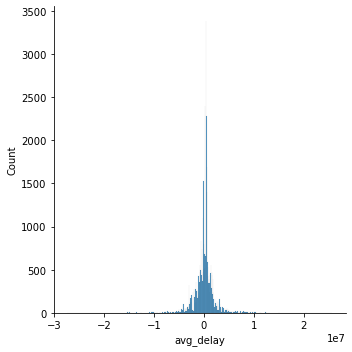

In [58]:
sns.displot(y['avg_delay'])
plt.show()

### You are expected to group the X_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [59]:
x_train=X_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

### You can make another distribution plot of the "doc_id" column from x_train

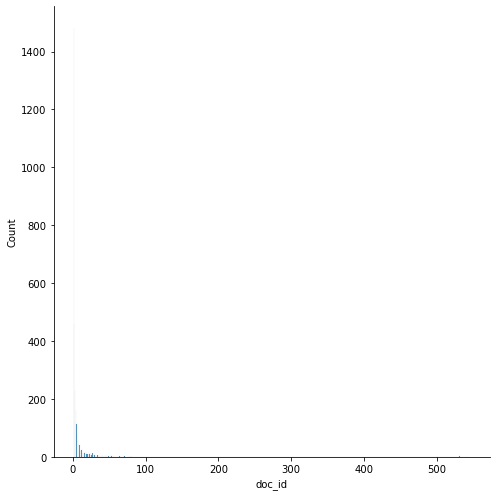

In [60]:
sns.displot(x_train['doc_id'],height=7)
plt.show()

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


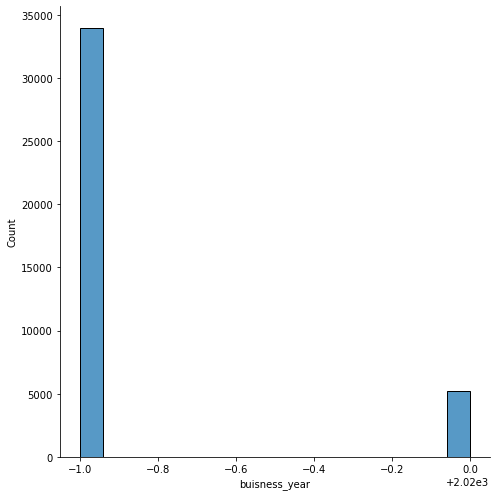

In [61]:
sns.displot(X['buisness_year'],height=7)
plt.show()

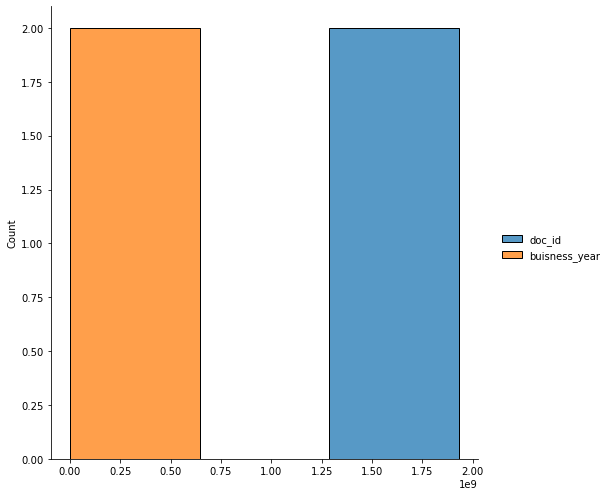

In [62]:
temp=pd.DataFrame(['buisness_year','doc_id'])
temp['doc_id']=X['doc_id']
temp['buisness_year']=X['buisness_year']
sns.displot(temp[temp.columns],height=7)
plt.show()

# Feature Engineering 

### Display and describe the X_train dataframe 

In [63]:
X_train

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
45718,U001,200794332,COST foundation,2020,1930448249,2020-01-28,2020-02-12,2020-01-28,NAAX,36273.03
17966,U001,200706844,WINC trust,2020,1930517131,2020-02-13,2020-02-28,2020-02-13,NAA8,6349.27
21322,U001,200803720,DEC us,2019,1928589714,2019-08-01,2019-01-24,2019-01-01,NAM4,282.84
38919,U001,200752302,KROGER,2020,1930508809,2020-12-02,2020-02-27,2020-02-12,NAA8,64749.18
25191,U001,200974851,RESTA co,2019,1929483483,2019-12-06,2019-06-27,2019-06-12,NAA8,2066.63
...,...,...,...,...,...,...,...,...,...,...
26152,U001,200769623,WAL-MAR associates,2019,1930152454,2019-11-14,2019-11-29,2019-11-14,NAH4,3449.63
40790,U001,200793568,SUPE in,2019,1930222273,2019-06-12,2019-12-21,2019-12-06,NAA8,40591.75
38558,U001,100036066,GROC associates,2019,1929174676,2019-04-22,2019-05-07,2019-04-22,NAA8,24869.32
26776,U001,200769623,WAL-MAR associates,2019,1929555422,2019-06-28,2019-07-13,2019-06-28,NAH4,42362.89


In [64]:
X_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.132247,2.014021e+09,30999.755826
std,0.338766,2.956842e+08,36630.432880
min,2019.000000,1.928502e+09,4.380000
25%,2019.000000,1.929174e+09,4622.179500
50%,2019.000000,1.929731e+09,16919.885000
75%,2019.000000,1.930209e+09,45911.302500
max,2020.000000,9.500000e+09,632134.240000


In [65]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23494 entries, 45718 to 3363
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         23494 non-null  object        
 1   cust_number           23494 non-null  object        
 2   name_customer         23494 non-null  object        
 3   buisness_year         23494 non-null  int64         
 4   doc_id                23494 non-null  int64         
 5   posting_date          23494 non-null  datetime64[ns]
 6   due_in_date           23494 non-null  datetime64[ns]
 7   baseline_create_date  23494 non-null  datetime64[ns]
 8   cust_payment_terms    23494 non-null  object        
 9   converted_usd         23494 non-null  float64       
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 2.0+ MB


#### The "business_code" column inside X_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [66]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(X_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [67]:
X_train['business_code_enc'] = business_coder.fit_transform(X_train['business_code'])

In [68]:
X_val['business_code_enc'] = business_coder.transform(X_val['business_code'])
X_test['business_code_enc'] = business_coder.transform(X_test['business_code'])

### Display "business_code" and "business_code_enc" together from X_train dataframe 

In [69]:
X_train[['business_code','business_code_enc']]

,business_code,business_code_enc
45718,U001,1
17966,U001,1
21322,U001,1
38919,U001,1
25191,U001,1
...,...,...
26152,U001,1
40790,U001,1
38558,U001,1
26776,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [70]:
def custom(col ,traindf = X_train,valdf = X_val,testdf = X_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in X_train ,X_val, X_test  

- Note = Fill in the blank to complete the code 

In [71]:
X_train , X_val , X_test = custom(['business_code'])

### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [72]:
X_train['cust_number'] = X_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_test['cust_number'] = X_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
X_val['cust_number'] = X_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [73]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [74]:
label_encoder = EncoderExt()
label_encoder.fit(X_train['name_customer'])
X_train['name_customer_enc']=label_encoder.transform(X_train['name_customer'])
X_val['name_customer_enc']=label_encoder.transform(X_val['name_customer'])
X_test['name_customer_enc']=label_encoder.transform(X_test['name_customer'])

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [75]:
X_train ,X_val, X_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [76]:
label_encoder1 = EncoderExt()
label_encoder1.fit(X_train['cust_payment_terms'])
X_train['cust_payment_terms_enc']=label_encoder1.transform(X_train['cust_payment_terms'])
X_val['cust_payment_terms_enc']=label_encoder1.transform(X_val['cust_payment_terms'])
X_test['cust_payment_terms_enc']=label_encoder1.transform(X_test['cust_payment_terms'])

In [77]:
X_train ,X_val, X_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to X

- Note - You are expected yo use dtype

In [78]:
X_train.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [79]:
X_test.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [80]:
X_val.dtypes

cust_number                        int32
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [81]:
X_train['day_of_postingdate'] = X_train['posting_date'].dt.day
X_train['month_of_postingdate'] = X_train['posting_date'].dt.month
X_train['year_of_postingdate'] = X_train['posting_date'].dt.year

X_val['day_of_postingdate'] = X_val['posting_date'].dt.day
X_val['month_of_postingdate'] = X_val['posting_date'].dt.month
X_val['year_of_postingdate'] = X_val['posting_date'].dt.year


X_test['day_of_postingdate'] = X_test['posting_date'].dt.day
X_test['month_of_postingdate'] = X_test['posting_date'].dt.month
X_test['year_of_postingdate'] = X_test['posting_date'].dt.year



### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [82]:
X_train ,X_val, X_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [83]:
X_train['day_of_createdate'] = X_train['baseline_create_date'].dt.day
X_train['month_of_createdate'] = X_train['baseline_create_date'].dt.month
X_train['year_of_createdate'] = X_train['baseline_create_date'].dt.year

X_val['day_of_createdate'] = X_val['baseline_create_date'].dt.day
X_val['month_of_createdate'] = X_val['baseline_create_date'].dt.month
X_val['year_of_createdate'] = X_val['baseline_create_date'].dt.year


X_test['day_of_createdate'] = X_test['baseline_create_date'].dt.day
X_test['month_of_createdate'] = X_test['baseline_create_date'].dt.month
X_test['year_of_createdate'] = X_test['baseline_create_date'].dt.year



### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [84]:
X_train ,X_val, X_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [85]:
X_train['day_of_due'] = X_train['due_in_date'].dt.day
X_train['month_of_due'] = X_train['due_in_date'].dt.month
X_train['year_of_due'] = X_train['due_in_date'].dt.year

X_val['day_of_due'] = X_val['due_in_date'].dt.day
X_val['month_of_due'] = X_val['due_in_date'].dt.month
X_val['year_of_due'] = X_val['due_in_date'].dt.year


X_test['day_of_due'] = X_test['due_in_date'].dt.day
X_test['month_of_due'] = X_test['due_in_date'].dt.month
X_test['year_of_due'] = X_test['due_in_date'].dt.year



pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [86]:
X_train ,X_val, X_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


In [87]:
X_train.dtypes

cust_number                 int32
buisness_year               int64
doc_id                      int64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [88]:
X_test.dtypes

cust_number                 int32
buisness_year               int64
doc_id                      int64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

In [89]:
X_val.dtypes

cust_number                 int32
buisness_year               int64
doc_id                      int64
converted_usd             float64
business_code_enc           int32
name_customer_enc           int64
cust_payment_terms_enc      int64
day_of_postingdate          int64
month_of_postingdate        int64
year_of_postingdate         int64
day_of_createdate           int64
month_of_createdate         int64
year_of_createdate          int64
day_of_due                  int64
month_of_due                int64
year_of_due                 int64
dtype: object

# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [90]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(X_train)
len(X_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [91]:
constant_columns = [column for column in X_train.columns
                    if column not in X_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [92]:
x_train_T = X_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [93]:
def handling_correlation(X_train,threshold=0.8):
    corr_features = set()
    corr_matrix = X_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from X_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [94]:
train=X_train.copy()
handling_correlation(train.copy(),0.85)

['month_of_due',
 'year_of_createdate',
 'day_of_createdate',
 'year_of_due',
 'year_of_postingdate']

### Heatmap for X_train

- Note - Keep the code as it is, no need to change

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

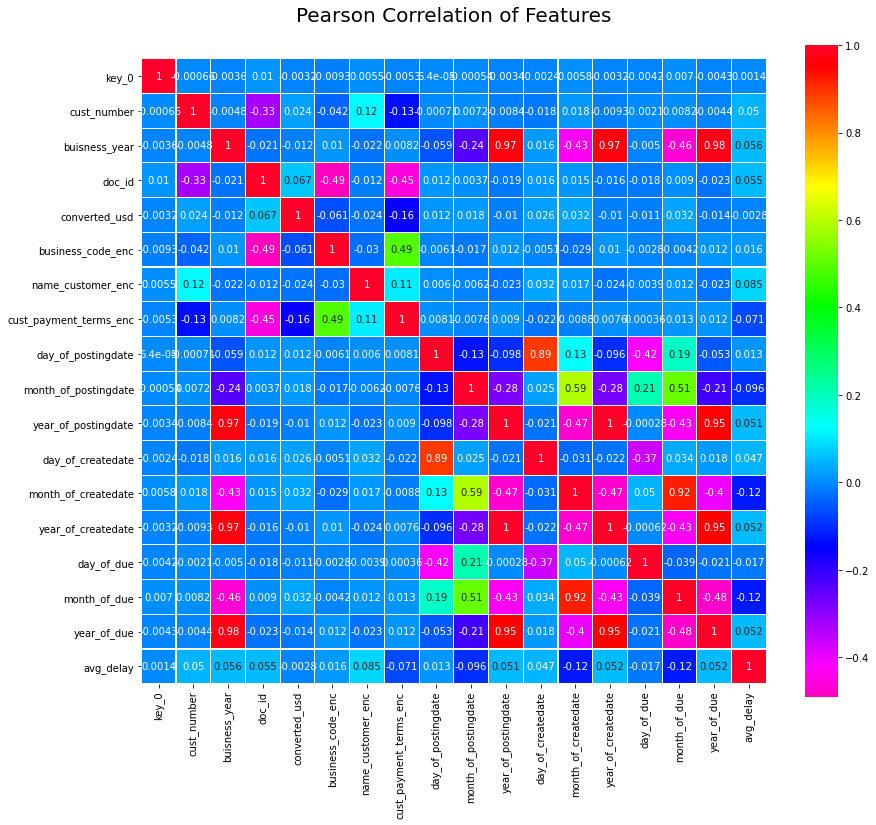

In [95]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(X_train.merge(y_train , on = X_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [96]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(X_train)

VarianceThreshold(threshold=0.8)

In [97]:
sel.variances_

array([1.81954912e+15, 1.14757386e-01, 8.74254278e+16, 1.34173150e+09,
       2.87927752e-01, 1.07015118e+06, 1.35481309e+02, 8.17239551e+01,
       1.19389088e+01, 1.14798749e-01, 7.70243713e+01, 1.22619699e+01,
       1.14937418e-01, 7.66173615e+01, 1.20665594e+01, 1.18125269e-01])

### Features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [98]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [99]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [100]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [101]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2412181.0593371433

### Display The Comparison Lists

In [102]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[5239635614670.08],[0.041575299134509414],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [103]:
from sklearn.svm import SVR
Algorithm.append('Support Vector Regression')
regressor = SVR()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [104]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [105]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2479194.820008129

### Display The Comparison Lists

In [106]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression'],[5239635614670.08, 5480938150995.953],[0.041575299134509414, -0.0025633258012955906],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [107]:
from sklearn.tree import DecisionTreeRegressor
Algorithm.append('Decision Tree Regressor')
regressor = DecisionTreeRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [108]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [109]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

3193817.9150460064

### Display The Comparison Lists

In [110]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor'],[5239635614670.08, 5480938150995.953, 9803752940469.332],[0.041575299134509414, -0.0025633258012955906, -0.7932848141234978],

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [111]:
from sklearn.ensemble import RandomForestRegressor
Algorithm.append('Random Forest Regressor')
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)
predicted= regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [112]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [113]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2196890.095479931

### Display The Comparison Lists


In [114]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor', 'Random Forest Regressor'],[5239635614670.08, 5480938150995.953, 9803752940469.332, 4417451130296.695],[0.041575299134509414, -0.0025633258012955906, -0.7932848141234978, 0.19196780282036463],

### The last but not the least model would be XGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the XGBoost Regressor from xgb library
- Step 2 : make an object of Xgboost
- Step 3 : fit the X_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the X_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [115]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
regressor = xgb.XGBRegressor()
regressor.fit(X_train, y_train)
predicted = regressor.predict(X_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [116]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [117]:
predict_test= regressor.predict(X_val)
mean_squared_error(y_val, predict_test, squared=False)

2194300.742933261

### Display The Comparison Lists


In [118]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regression', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGB Regressor'],[5239635614670.08, 5480938150995.953, 9803752940469.332, 4417451130296.695, 4360416216588.096],[0.041575299134509414, -0.0025633258012955906, -0.7932848141234978, 0.19196780282036463, 0.20240052641606754],

## You need to make the comparison list into a comparison dataframe 

In [119]:
comparison=pd.DataFrame(list(zip(Algorithm,MSE_Score,R2_Score)),columns=['Algorithm','MSE_Score','R2_Score'] )

In [120]:
comparison

,Algorithm,MSE_Score,R2_Score
0,LinearRegression,5.239636e+12,0.041575
1,Support Vector Regression,5.480938e+12,-0.002563
2,Decision Tree Regressor,9.803753e+12,-0.793285
3,Random Forest Regressor,4.417451e+12,0.191968
4,XGB Regressor,4.360416e+12,0.202401


## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit X_train and y_train inside the model 
- Step 2 - Predict the X_test dataset
- Step 3 - Predict the X_val dataset


- Note - No need to change the code

In [121]:
regressorfinal = xgb.XGBRegressor()
regressorfinal.fit(X_train, y_train)
predictedfinal = regressorfinal.predict(X_test)
predict_testfinal = regressorfinal.predict(X_val)

In [163]:
import pickle
filename = 'model.sav'
pickle.dump(regressorfinal, open(filename, 'wb'))

In [164]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X_test, y_test)

In [165]:
print(result)

0.20240052641606754


### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [123]:
mean_squared_error(y_test,predictedfinal,squared=False)

2088160.9652007425

### Calculate the mean Square Error for validation dataset

In [124]:
mean_squared_error(y_val,predict_testfinal,squared=False)

2194300.742933261

### Calculate the R2 score for test

In [125]:
r2_score(y_test, predictedfinal)

0.20240052641606754

### Calculate the R2 score for Validation

In [126]:
r2_score(y_val, predict_testfinal)

0.21472227810570366

### Calculate the Accuracy for train Dataset 

In [127]:
predict_train=regressorfinal.predict(X_train)

In [128]:
print('Accuracy : ',(r2_score(y_train, predict_train))*100,'%')

Accuracy :  65.35266069007622 %


### Calculate the accuracy for validation

In [129]:
print('Accuracy : ',(r2_score(y_val, predict_testfinal))*100,'%')

Accuracy :  21.472227810570367 %


### Calculate the accuracy for test

In [130]:
print('Accuracy : ',(r2_score(y_test, predictedfinal))*100,'%')

Accuracy :  20.240052641606752 %


# Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

 I will select **XGB Regressor** model, because as you can see from the comparison table **XGB Regressor** has the **highest R2-Score** ,hence **highest Accuracy** and **lowest MSE_Score** hence **low bias**.

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

In [131]:
nulldata

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.790
7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.020
10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.590
14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.650
15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.060
...,...,...,...,...,...,...,...,...,...,...,...
50094,CA02,140106408,WAL-M corp,NaT,2020,2960618884,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589
50095,CA02,140106408,WAL-M corp,NaT,2020,2960618885,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589
50096,CA02,140106408,WAL-M corp,NaT,2020,2960618886,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589
50097,CA02,140106408,WAL-M corp,NaT,2020,2960618887,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589


### Check for the number of rows and columns in the nulldata

In [132]:
ctr_rows_cols(nulldata)

Rows :  9779 
Columns :  11


### Check the Description and Information of the nulldata 

In [133]:
nulldata.describe()

,buisness_year,doc_id,converted_usd
count,9779.0,9.779000e+03,9779.000000
mean,2020.0,2.015730e+09,32395.557081
std,0.0,2.824983e+08,35393.870859
min,2020.0,1.930535e+09,0.720000
25%,2020.0,1.930660e+09,5731.950000
50%,2020.0,1.930732e+09,19403.930000
75%,2020.0,1.930821e+09,48806.640000
max,2020.0,2.960636e+09,653644.800000


In [134]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9779 entries, 3 to 50098
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   business_code         9779 non-null   object        
 1   cust_number           9779 non-null   object        
 2   name_customer         9779 non-null   object        
 3   clear_date            0 non-null      datetime64[ns]
 4   buisness_year         9779 non-null   int64         
 5   doc_id                9779 non-null   int64         
 6   posting_date          9779 non-null   datetime64[ns]
 7   due_in_date           9779 non-null   datetime64[ns]
 8   baseline_create_date  9779 non-null   datetime64[ns]
 9   cust_payment_terms    9779 non-null   object        
 10  converted_usd         9779 non-null   float64       
dtypes: datetime64[ns](4), float64(1), int64(2), object(4)
memory usage: 916.8+ KB


### Storing the Nulldata into a different dataset 
# for BACKUP

In [135]:
nulldata_backup=nulldata.copy()

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [136]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [137]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

In [138]:
nulldata['day_of_cleardate'] = nulldata['clear_date'].dt.day
nulldata['month_of_cleardate'] = nulldata['clear_date'].dt.month
nulldata['year_of_cleardate'] = nulldata['clear_date'].dt.year

nulldata['day_of_postingdate'] = nulldata['posting_date'].dt.day
nulldata['month_of_postingdate'] = nulldata['posting_date'].dt.month
nulldata['year_of_postingdate'] = nulldata['posting_date'].dt.year

nulldata['day_of_due'] = nulldata['due_in_date'].dt.day
nulldata['month_of_due'] = nulldata['due_in_date'].dt.month
nulldata['year_of_due'] = nulldata['due_in_date'].dt.year

nulldata['day_of_createdate'] = nulldata['baseline_create_date'].dt.day
nulldata['month_of_createdate'] = nulldata['baseline_create_date'].dt.month
nulldata['year_of_createdate'] = nulldata['baseline_create_date'].dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [139]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

In [140]:
nulldata.dtypes

business_code                     object
cust_number                        int32
name_customer                     object
clear_date                datetime64[ns]
buisness_year                      int64
doc_id                             int64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
cust_payment_terms                object
converted_usd                    float64
business_code_enc                  int64
day_of_cleardate                 float64
month_of_cleardate               float64
year_of_cleardate                float64
day_of_postingdate                 int64
month_of_postingdate               int64
year_of_postingdate                int64
day_of_due                         int64
month_of_due                       int64
year_of_due                        int64
day_of_createdate                  int64
month_of_createdate                int64
year_of_createdate                 int64
cust_payment_ter

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

In [141]:
lst=['business_code',"baseline_create_date","due_in_date","posting_date","name_customer","clear_date","cust_payment_terms",'day_of_cleardate',"month_of_cleardate","year_of_cleardate"]

nulldata=nulldata.drop(lst,axis=1)

### Check the information of the "nulldata" dataframe

In [142]:
nulldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9779 entries, 3 to 50098
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             9779 non-null   int32  
 1   buisness_year           9779 non-null   int64  
 2   doc_id                  9779 non-null   int64  
 3   converted_usd           9779 non-null   float64
 4   business_code_enc       9779 non-null   int64  
 5   day_of_postingdate      9779 non-null   int64  
 6   month_of_postingdate    9779 non-null   int64  
 7   year_of_postingdate     9779 non-null   int64  
 8   day_of_due              9779 non-null   int64  
 9   month_of_due            9779 non-null   int64  
 10  year_of_due             9779 non-null   int64  
 11  day_of_createdate       9779 non-null   int64  
 12  month_of_createdate     9779 non-null   int64  
 13  year_of_createdate      9779 non-null   int64  
 14  cust_payment_terms_enc  9779 non-null  

### Compare "nulldata" with the "X_test" dataframe 

- use info() method

In [143]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7832 entries, 23619 to 5096
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   cust_number             7832 non-null   int32  
 1   buisness_year           7832 non-null   int64  
 2   doc_id                  7832 non-null   int64  
 3   converted_usd           7832 non-null   float64
 4   business_code_enc       7832 non-null   int32  
 5   name_customer_enc       7832 non-null   int64  
 6   cust_payment_terms_enc  7832 non-null   int64  
 7   day_of_postingdate      7832 non-null   int64  
 8   month_of_postingdate    7832 non-null   int64  
 9   year_of_postingdate     7832 non-null   int64  
 10  day_of_createdate       7832 non-null   int64  
 11  month_of_createdate     7832 non-null   int64  
 12  year_of_createdate      7832 non-null   int64  
 13  day_of_due              7832 non-null   int64  
 14  month_of_due            7832 non-nul

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "X_test" dataframe

- Display all the columns of the X_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [144]:
X_test.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due'],
      dtype='object')

In [145]:
nulldata.columns

Index(['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'day_of_postingdate', 'month_of_postingdate',
       'year_of_postingdate', 'day_of_due', 'month_of_due', 'year_of_due',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'cust_payment_terms_enc', 'name_customer_enc'],
      dtype='object')

In [146]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

In [147]:
nulldata2

,cust_number,buisness_year,doc_id,converted_usd,business_code_enc,name_customer_enc,cust_payment_terms_enc,day_of_postingdate,month_of_postingdate,year_of_postingdate,day_of_createdate,month_of_createdate,year_of_createdate,day_of_due,month_of_due,year_of_due
3,140105686,2020,2960623488,2309.790,66,2714,5,30,3,2020,31,3,2020,10,4,2020
7,200744019,2020,1930659387,11173.020,66,2798,18,19,3,2020,19,3,2020,3,4,2020
10,200418007,2020,1930610806,3525.590,66,89,18,3,11,2020,11,3,2020,26,3,2020
14,200739534,2020,1930788296,121105.650,66,2043,18,15,4,2020,15,4,2020,30,4,2020
15,200353024,2020,1930817482,3726.060,66,733,34,23,4,2020,16,4,2020,26,4,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50094,140106408,2020,2960618884,64982.589,66,2987,5,3,6,2020,6,3,2020,16,3,2020
50095,140106408,2020,2960618885,64982.589,66,2987,5,3,6,2020,6,3,2020,16,3,2020
50096,140106408,2020,2960618886,64982.589,66,2987,5,3,6,2020,6,3,2020,16,3,2020
50097,140106408,2020,2960618887,64982.589,66,2987,5,3,6,2020,6,3,2020,16,3,2020


### Now you can pass this dataset into you final model and store it into "final_result"

In [148]:
final_result=regressorfinal.predict(nulldata2)

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [149]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

In [150]:
final_result

0       1.866536e+06
1       1.114781e+06
2       5.050122e+06
3      -8.453994e+05
4      -7.563377e+05
            ...     
9774    2.617879e+06
9775    2.617879e+06
9776    2.617879e+06
9777    2.617879e+06
9778    2.617879e+06
Name: avg_delay, Length: 9779, dtype: float32

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [151]:
nulldata_backup.reset_index(drop=True,inplace=True)
Final = nulldata_backup.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

In [152]:
Final

,key_0,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,avg_delay
0,3,CA02,140105686,SYSC llc,NaT,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.790,1.866536e+06
1,7,U001,200744019,TARG us,NaT,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.020,1.114781e+06
2,10,U001,200418007,AM,NaT,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.590,5.050122e+06
3,14,U001,200739534,OK systems,NaT,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.650,-8.453994e+05
4,15,U001,200353024,DECA corporation,NaT,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.060,-7.563377e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9774,50094,CA02,140106408,WAL-M corp,NaT,2020,2960618884,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589,2.617879e+06
9775,50095,CA02,140106408,WAL-M corp,NaT,2020,2960618885,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589,2.617879e+06
9776,50096,CA02,140106408,WAL-M corp,NaT,2020,2960618886,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589,2.617879e+06
9777,50097,CA02,140106408,WAL-M corp,NaT,2020,2960618887,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589,2.617879e+06


### Check for the Number of Rows and Columns in your "Final" dataframe 

In [153]:
ctr_rows_cols(Final)

Rows :  9779 
Columns :  13


### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [154]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

In [155]:
Final['clear_date']

0      2020-05-01 14:28:56.250000
1      2020-04-15 21:39:40.875000
2      2020-05-23 10:48:42.000000
3      2020-04-20 05:10:00.562500
4      2020-04-17 05:54:22.312500
                  ...            
9774   2020-04-15 07:11:19.250000
9775   2020-04-15 07:11:19.250000
9776   2020-04-15 07:11:19.250000
9777   2020-04-15 07:11:19.250000
9778   2020-04-15 07:11:19.250000
Name: clear_date, Length: 9779, dtype: datetime64[ns]

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [156]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

In [157]:
Final['avg_delay']

0       21.0
1       12.0
2       58.0
3      -10.0
4       -9.0
        ... 
9774    30.0
9775    30.0
9776    30.0
9777    30.0
9778    30.0
Name: avg_delay, Length: 9779, dtype: float64

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [158]:
bins= [Final['avg_delay'].min(),0,15,30,45,60,Final['avg_delay'].max()+1]
labels =['Less than 0','0-15','16-30','31-45','46-60','Greatar than 60']
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

In [159]:
lst=['key_0','avg_delay']

Final=Final.drop(lst,axis=1)

### Display the count of each categoty of new "Aging Bucket" column 

In [160]:
Final['Aging Bucket'].value_counts()

16-30              2416
Less than 0        2297
31-45              2137
0-15               2112
46-60               570
Greatar than 60     247
Name: Aging Bucket, dtype: int64

### Display your final dataset with aging buckets 

In [161]:
Final

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,Aging Bucket
0,CA02,140105686,SYSC llc,2020-05-01 14:28:56.250000,2020,2960623488,2020-03-30,2020-04-10,2020-03-31,CA10,2309.790,16-30
1,U001,200744019,TARG us,2020-04-15 21:39:40.875000,2020,1930659387,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.020,0-15
2,U001,200418007,AM,2020-05-23 10:48:42.000000,2020,1930610806,2020-11-03,2020-03-26,2020-03-11,NAA8,3525.590,46-60
3,U001,200739534,OK systems,2020-04-20 05:10:00.562500,2020,1930788296,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.650,Less than 0
4,U001,200353024,DECA corporation,2020-04-17 05:54:22.312500,2020,1930817482,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.060,Less than 0
...,...,...,...,...,...,...,...,...,...,...,...,...
9774,CA02,140106408,WAL-M corp,2020-04-15 07:11:19.250000,2020,2960618884,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589,31-45
9775,CA02,140106408,WAL-M corp,2020-04-15 07:11:19.250000,2020,2960618885,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589,31-45
9776,CA02,140106408,WAL-M corp,2020-04-15 07:11:19.250000,2020,2960618886,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589,31-45
9777,CA02,140106408,WAL-M corp,2020-04-15 07:11:19.250000,2020,2960618887,2020-06-03,2020-03-16,2020-03-06,CA10,64982.589,31-45


### Store this dataframe into the .csv format

In [162]:
Final.to_csv('final.csv')

# END OF THE PROJECT